__These are the data-set for the number of car accidents in the rush hour of a small city. You
are assigned to predict the number of car accidents in a given hour of the day. You
need to find the full probability distribution of this quantity.
Also, make sure to clearly state the assumptions you are making at each step.__

__16 24 16 12 16 11 14 15 9 14 7__

__Table 1: The Number of Accident during rush hour__

__Assumptions__

- The probability of a car accident is the same during each traffic hour at which the datapoint was recorded 
- The numbers of recorded car accidents are representative of the population
- The distribution of car accidents is a normal distribution since variation around the mean should be symmetrical for a big enough sample size
- The calculated mean is representative of the true mean for entire population

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load data
traffic_acc = [16,24,16,12,16,11,14,15,9,14,7]
df = pd.DataFrame(traffic_acc)
df.describe()

,0
count,11.000000
mean,14.000000
std,4.472136
min,7.000000
25%,11.500000
50%,14.000000
75%,16.000000
max,24.000000


In [33]:
def Gaussian_prob(x, _mu=0, _sigma=1):
    """Gaussian disturbution: probability of getting x given mu=_mu, sigma=_sigma"""
    return (1/np.sqrt(2*np.pi*_sigma**2))*np.exp(-(x-_mu)**2/(2*_sigma**2))

In [37]:
x_span = np.linspace(0,30, 1000)
mu, sigma = 14, 4.472136

prob_list = [Gaussian_prob(x, mu, sigma) for x in x_span]

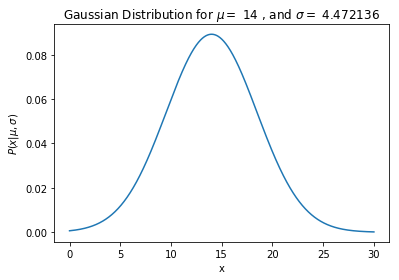

In [38]:
plt.plot(x_span, prob_list)

plt.title("Gaussian Distribution for $\mu=$ {} , and $\sigma=$ {}".format(mu, sigma))
plt.xlabel(r"x")
plt.ylabel(r"$P(x|\mu, \sigma)$")

plt.show()

__Write a python function to find µ and σ:__


In [5]:
#Example from Class for two gaussian
def n_gaussian(l_mu, l_sig): 
    return (mu1*sigma2**2+mu2*sigma1**2)/(sigma1**2+sigma2**2), (sigma2*sigma1)/np.sqrt(sigma1**2+sigma2**2)

__Expand on example from class for 3 gaussian__

$Gaussian($
$\frac{(\mu1 = 1)(\sigma2=5)^2  + (\mu1 = 1)(\sigma3=6)^2 + (\mu2 = 2)(\sigma1=4)^2 + (\mu2 = 2)(\sigma3=6)^2  + (\mu3 = 3)(\sigma1=4)^2 + (\mu3 = 3)(\sigma2=5)^2}{(\sigma1=4)^2 + (\sigma2=5)^2 + (\sigma3=6)^2 }$ ,$\frac{(\sigma1=4)(\sigma2=5)(\sigma3=6)}{\sqrt{(\sigma1=4)^2) + (\sigma2=5)^2} + (\sigma3=6)^2}$ )

__Function Solution__

In [7]:
def n_gaussian(mu,std):
    
    def num_mu():
        arr = []
        #loop through array and take out the corresponding index
        for index, number in enumerate(mu) :
            b_list = std
            new_b = np.delete(b_list, index)
            sol = sum(number * (new_b**2))
            arr.append(sol)
        return(sum(arr))

    def den_mu():
        return sum(std**2)
    
    def num_std():
        a = 1
        a = float(a)
        for number in std:
            a *= number
        return a
    
    def den_std():
        return np.sqrt(sum(std**2))
        
    return((num_mu()/den_mu()),num_std()/den_std())

In [8]:
#class example
a = np.array([10.12, 7.42])
b = np.array([3.7,1.6])

#random list of array to test 
c = np.arange(1,100)
d = np.arange(1,100)

e =  np.array([10,20,30,40,50,60,70,80])
f =  np.array([50,60,70,80,90,100,110,120])

print (n_gaussian(a,b))
print (n_gaussian(c,d))
print (n_gaussian(e,f))

(7.845353846153847, 1.4685712575362284)
(4875.37688442211, 1.6286776789488893e+153)
(303.48387096774195, 8015486326983.816)
